<a href="https://colab.research.google.com/github/Kyl23/GAI-Project-4/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Utils

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/GAI Project 4

/content/drive/.shortcut-targets-by-id/1FomRY9GfjP5cwgSXEfWO-HArVnuZTe1i/GAI Project 4


In [3]:
import matplotlib.pyplot as plt

def show_images(images, title):
    fig, axes = plt.subplots(3, 3, figsize=(3, 3))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.squeeze().cpu().numpy(), cmap='gray')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 設置數據轉換（轉換為Tensor並正則化）
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 加載MNIST訓練和測試數據集
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        self.encoder1 = self.conv_block(in_channels, 64)
        self.encoder2 = self.conv_block(64, 128)
        self.encoder3 = self.conv_block(128, 256)
        self.encoder4 = self.conv_block(256, 512)

        self.middle = self.conv_block(512, 1024)

        self.upconv1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.decoder1 = self.conv_block(1024, 512)

        self.upconv2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.decoder2 = self.conv_block(512, 256)

        self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.decoder3 = self.conv_block(256, 128)

        self.upconv4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder4 = self.conv_block(128, 64)

        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
        return block

    def forward(self, x):
        # Encoder
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(F.max_pool2d(enc1, 2))
        enc3 = self.encoder3(F.max_pool2d(enc2, 2))
        enc4 = self.encoder4(F.max_pool2d(enc3, 2))

        # Middle
        middle = self.middle(F.max_pool2d(enc4, 2))

        # Decoder
        dec1 = self.upconv1(middle)
        dec1 = F.interpolate(dec1, size=enc4.shape[2:], mode='bilinear', align_corners=True)
        dec1 = torch.cat([dec1, enc4], dim=1)
        dec1 = self.decoder1(dec1)

        dec2 = self.upconv2(dec1)
        dec2 = F.interpolate(dec2, size=enc3.shape[2:], mode='bilinear', align_corners=True)
        dec2 = torch.cat([dec2, enc3], dim=1)
        dec2 = self.decoder2(dec2)

        dec3 = self.upconv3(dec2)
        dec3 = F.interpolate(dec3, size=enc2.shape[2:], mode='bilinear', align_corners=True)
        dec3 = torch.cat([dec3, enc2], dim=1)
        dec3 = self.decoder3(dec3)

        dec4 = self.upconv4(dec3)
        dec4 = F.interpolate(dec4, size=enc1.shape[2:], mode='bilinear', align_corners=True)
        dec4 = torch.cat([dec4, enc1], dim=1)
        dec4 = self.decoder4(dec4)

        output = self.final_conv(dec4)
        return output


## DIP

In [ ]:
import torch
from torch import nn, optim
from torch.nn import functional as F

In [ ]:
# 設置DataLoader
batch_size = 512
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Training epoch [1/10]:   0%|          | 0/118 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Training epoch [1/10]: 100%|██████████| 118/118 [01:18<00:00,  1.50it/s, loss=0.269]


Epoch [1/10], Step [119/118], Loss: 38.6191


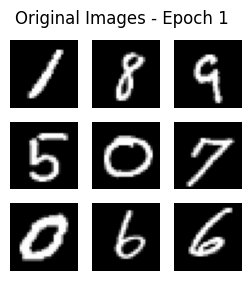

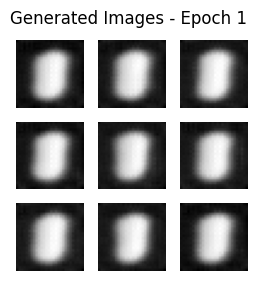

Training epoch [2/10]: 100%|██████████| 118/118 [01:14<00:00,  1.58it/s, loss=0.266]


Epoch [2/10], Step [119/118], Loss: 32.0615


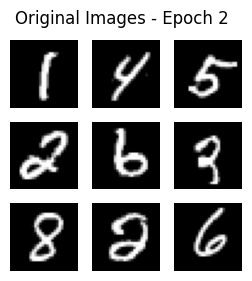

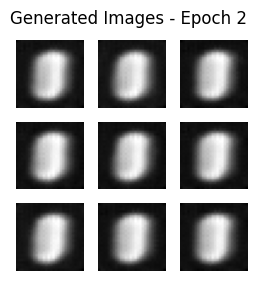

Training epoch [3/10]: 100%|██████████| 118/118 [01:14<00:00,  1.58it/s, loss=0.262]


Epoch [3/10], Step [119/118], Loss: 31.8867


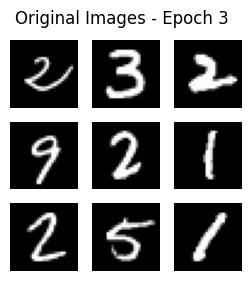

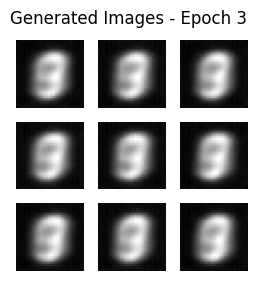

Training epoch [4/10]: 100%|██████████| 118/118 [01:14<00:00,  1.58it/s, loss=0.265]


Epoch [4/10], Step [119/118], Loss: 31.8026


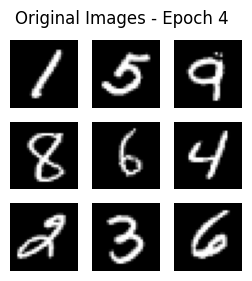

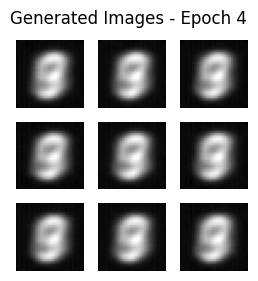

Training epoch [5/10]: 100%|██████████| 118/118 [01:14<00:00,  1.58it/s, loss=0.271]


Epoch [5/10], Step [119/118], Loss: 31.7850


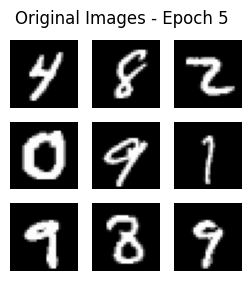

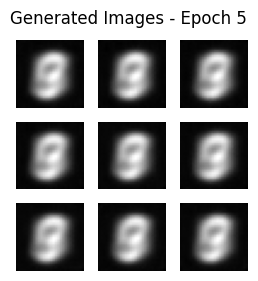

Training epoch [6/10]: 100%|██████████| 118/118 [01:14<00:00,  1.58it/s, loss=0.268]


Epoch [6/10], Step [119/118], Loss: 31.7747


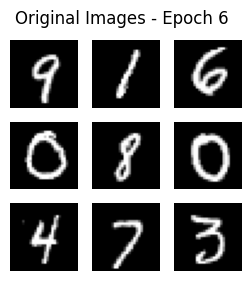

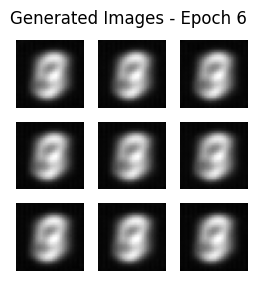

Training epoch [7/10]: 100%|██████████| 118/118 [01:14<00:00,  1.58it/s, loss=0.26]


Epoch [7/10], Step [119/118], Loss: 31.7630


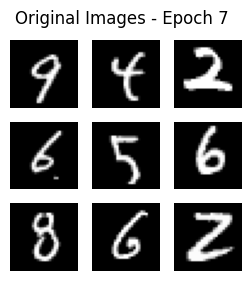

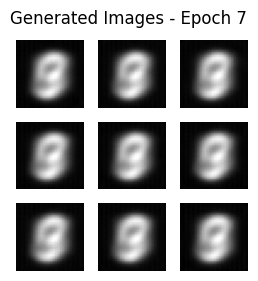

Training epoch [8/10]: 100%|██████████| 118/118 [01:14<00:00,  1.58it/s, loss=0.279]


Epoch [8/10], Step [119/118], Loss: 31.7852


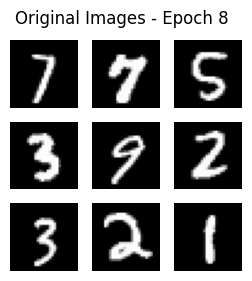

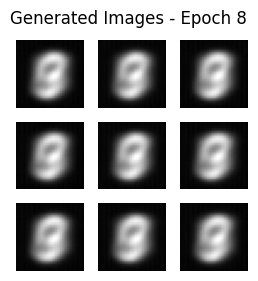

Training epoch [9/10]: 100%|██████████| 118/118 [01:14<00:00,  1.58it/s, loss=0.27]


Epoch [9/10], Step [119/118], Loss: 31.7718


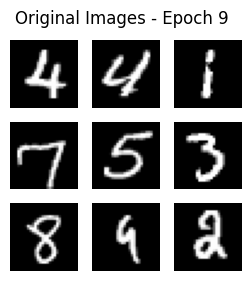

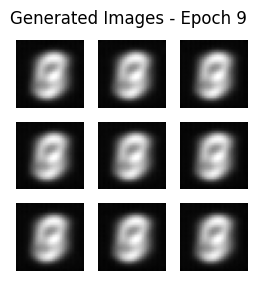

Training epoch [10/10]: 100%|██████████| 118/118 [01:14<00:00,  1.57it/s, loss=0.271]


Epoch [10/10], Step [119/118], Loss: 31.7764


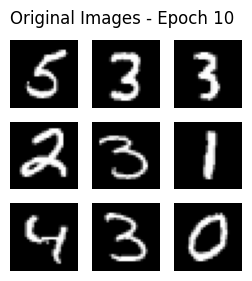

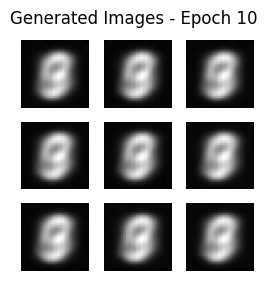

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

# 初始化DIP模型
dip = UNet(in_channels=1, out_channels=1).cuda()

optimizer = optim.Adam(dip.parameters(), lr=0.01)

# 顯示圖像的輔助函數
def show_images(images, title):
    fig, axes = plt.subplots(3, 3, figsize=(3, 3))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.squeeze().cpu().numpy(), cmap='gray')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

# DIP模型訓練循環
num_epochs = 10
for epoch in range(num_epochs):
    pbar = tqdm(train_loader)
    pbar.set_description(f"Training epoch [{epoch+1}/{num_epochs}]")
    i = 0
    total_loss = 0
    for images, _ in pbar:
        # 生成隨機噪聲
        noise = torch.randn_like(images)
        noise = noise.cuda()
        images = images.cuda()

        # DIP前向傳播
        outputs = dip(noise)

        # 計算損失
        loss = criterion(outputs, images)

        # 反向傳播和優化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        pbar.set_postfix(loss = loss.item())
        i += 1


    print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {total_loss:.4f}')
    # 每個Epoch結束後顯示9張圖像
    with torch.no_grad():
        sample_images = images[:9]
        generated_images = outputs[:9]
        show_images(sample_images, f'Original Images - Epoch {epoch+1}')
        show_images(generated_images, f'Generated Images - Epoch {epoch+1}')



In [ ]:
torch.save(dip, f'dip.mod')

## DDPM

In [6]:
class DDPM(nn.Module):
    def __init__(self, model, dip):
        super(DDPM, self).__init__()
        self.model = model
        self.dip = dip
        self.T = 10
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.criterion = nn.MSELoss()

    def generate_noise(self, dip_images, images, t=0):
        assert t > 0
        images = images - (images - dip_images) // 10 * t
        next_images = images - (images - dip_images) // 10 * (t - 1)
        return images, next_images

    def generate(self, size):

        for i in range(size):
          with torch.no_grad():
              noise = torch.randn(size, 1, 28, 28)
              noise = noise.cuda()
              dip_images = dip(noise)

              out = dip_images
              for t in range(self.T, 0, -1):
                  out = self.model(out)

        return dip_images, out

    def forward(self, images):
        with torch.no_grad():
            noise = torch.randn_like(images)
            noise = noise.cuda()
            dip_images = dip(noise)

        loss = None
        for t in range(self.T, 0, -1):
            x, y = self.generate_noise(dip_images, images, t)
            if loss == None:
              loss = F.mse_loss(self.model(x), y)
            else:
              loss += F.mse_loss(self.model(x), y)
        return loss


In [7]:
dip = torch.load('dip.mod')

In [8]:
# 初始化DDPM模型
device = 'cuda' if torch.cuda.is_available() else 'cpu'
unet = UNet(in_channels=1,out_channels=1)
ddpm = DDPM(unet, dip).cuda()

optimizer = torch.optim.Adam(ddpm.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [9]:
# 設置DataLoader
batch_size = 256
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
from tqdm import tqdm

num_epochs = 10
ddpm.train()
for epoch in range(num_epochs):
    pbar = tqdm(train_loader)
    pbar.set_description(f"Training epoch [{epoch+1}/{num_epochs}]")
    i = 0
    total_loss = 0
    for images, _ in pbar:
        images = images.cuda()

        optimizer.zero_grad()
        loss = ddpm(images)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        pbar.set_postfix(loss = loss.item())
        i += 1

    print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {total_loss:.4f}')

    # 每個Epoch結束後顯示9張圖像
    with torch.no_grad():
        dip_images, generated_images = ddpm.generate(9)
        show_images(dip_images, f'Generated Images - Epoch {epoch+1}')
        show_images(generated_images, f'Generated Images - Epoch {epoch+1}')

Training epoch [1/10]:   0%|          | 0/235 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Training epoch [1/10]:  29%|██▉       | 68/235 [03:02<07:25,  2.67s/it, loss=80.2]

In [ ]:
dip_images, generated_images = ddpm.generate(9)
show_images(dip_images, f'Generated Images - Epoch {0+1}')
show_images(generated_images, f'Generated Images - Epoch {0+1}')